In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from dataset.chestxray import ChestXRayDataset

from dotenv import load_dotenv

/cluster/home/larsira/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
load_dotenv()
db_path = os.getenv("DB_PATH")
img_dir_name = os.getenv("IMG_DIR")
class_file = os.getenv("CLASSIFICATION_FILE")

In [3]:
def count_occurences(dataset, label):
    finds = datas[datas["Finding Labels"].str.contains(label)]
    return len(finds)

def count_exclusive_occurences(dataset, label):
    finds = datas[datas["Finding Labels"] == label]
    return len(finds)

In [4]:
def get_class_counts(dataset, class_labels, no_find):
    finding_values = {"Total": [], "Multi-label findings": [], "Single findings": []}
    dataframe = pd.DataFrame({"Total": [], "Multi-label findings": [], "Single findings": []}, index=[])
    
    for label in class_labels:
        total_findings = count_occurences(dataset, label)
        finding_values["Total"].append(total_findings)
        dataframe.loc[label] = [total_findings, None, None]
        if label == no_find:
            dataframe.loc[label] = [total_findings, None, total_findings]
        if label != no_find:        
            single_finds = count_exclusive_occurences(dataset, label)
            multi_findings = total_findings - single_finds
            finding_values["Multi-label findings"].append(multi_findings)
            finding_values["Single findings"].append(single_finds)
            dataframe.loc[label] = [total_findings, multi_findings, single_finds]

    return finding_values, dataframe

def create_bar_chart(datas, classes, no_finding_label, sort_column, title, file_name):
    color_pattern = ["b", "g", "r"]
    values, finding_df = get_class_counts(datas, classes, no_finding_label)
    finding_df = finding_df.sort_values(by=[sort_column], ascending=False)
    col_width = .33
    
    x = np.arange(len(classes))
    figure, axis = plt.subplots(figsize=(24,24))
    
    col_index=0
    for find_type, quantity in finding_df.items():
        offset = col_width * col_index
        bars = axis.bar(x+offset, quantity, col_width, label=find_type)
        axis.bar_label(bars, padding=3)
        col_index+=1
    
    axis.set_xticks(x + col_width, finding_df.index)
    axis.legend(loc="upper left", ncols=2)
    plt.title(title)
    plt.savefig(file_name)
    plt.show()

def create_pie_chart(sizes, value_key, title, file_name):
    fig, ax = plt.subplots(figsize=(16,16))
    ax.pie(sizes[value_key].tolist(), labels=sizes.index.tolist(), autopct='%1.1f%%')
    plt.title(title)
    plt.savefig(file_name)
    fig.show()

# Actions, ChestXRay14

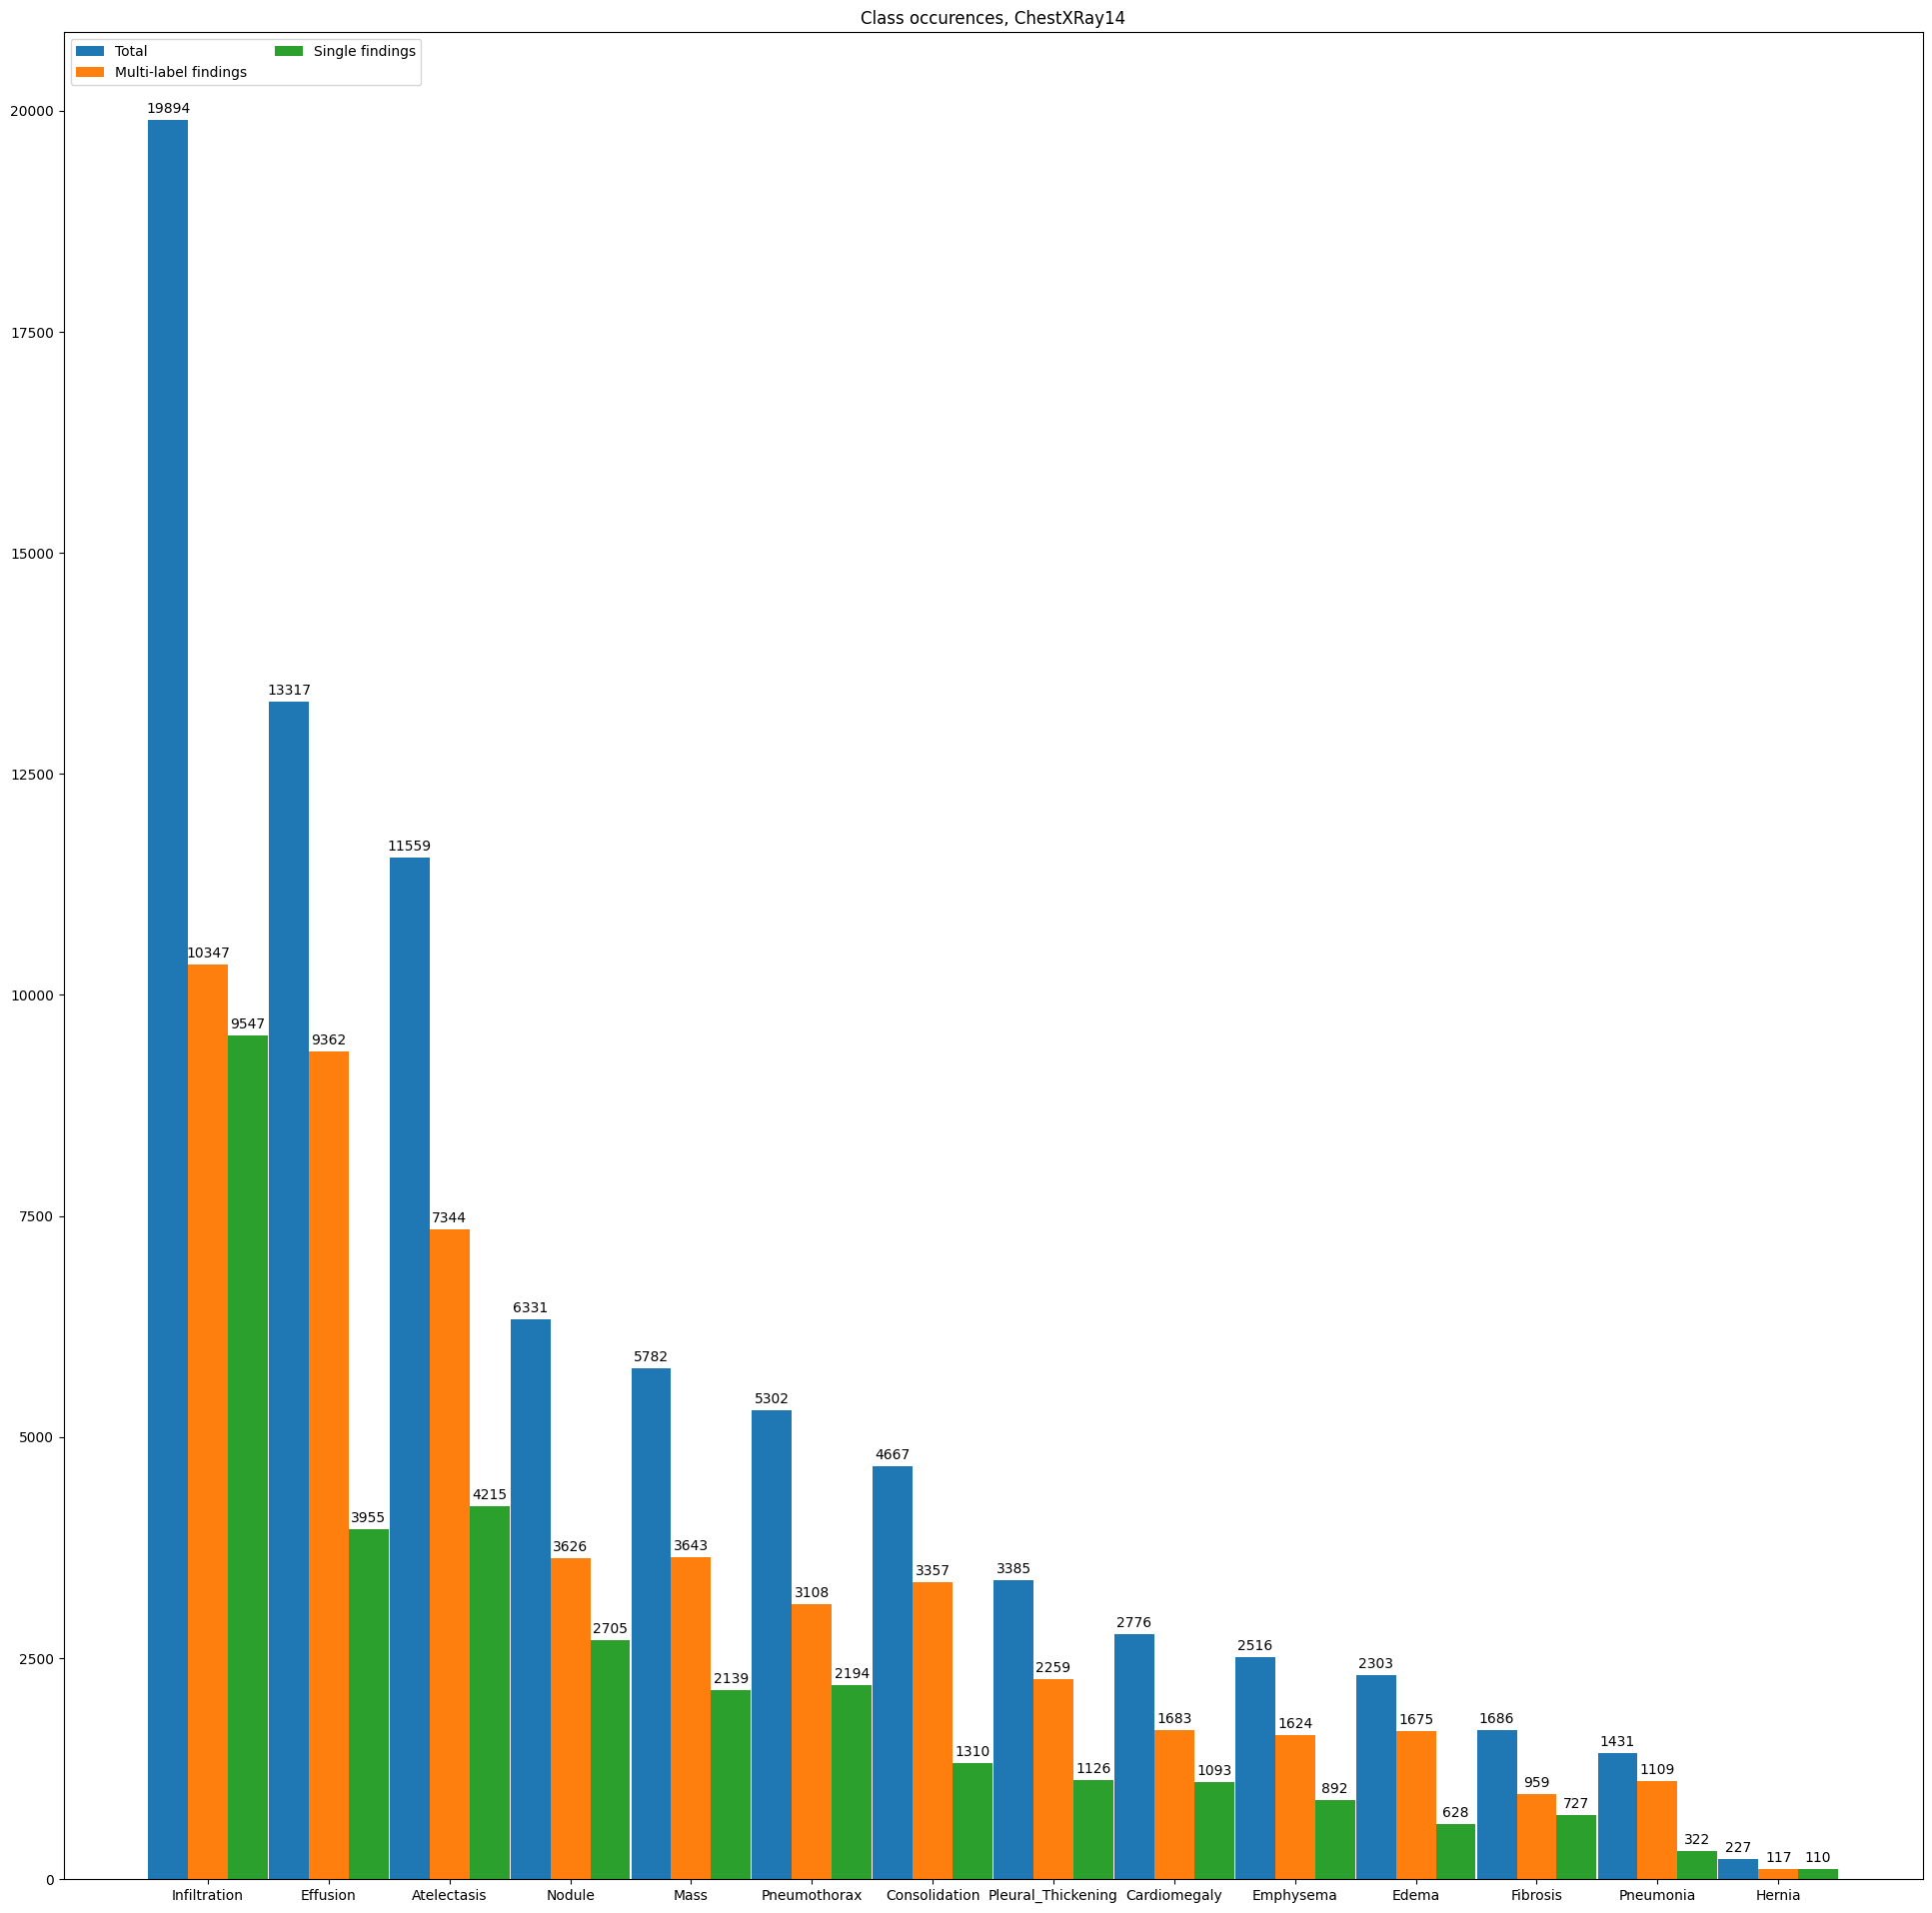

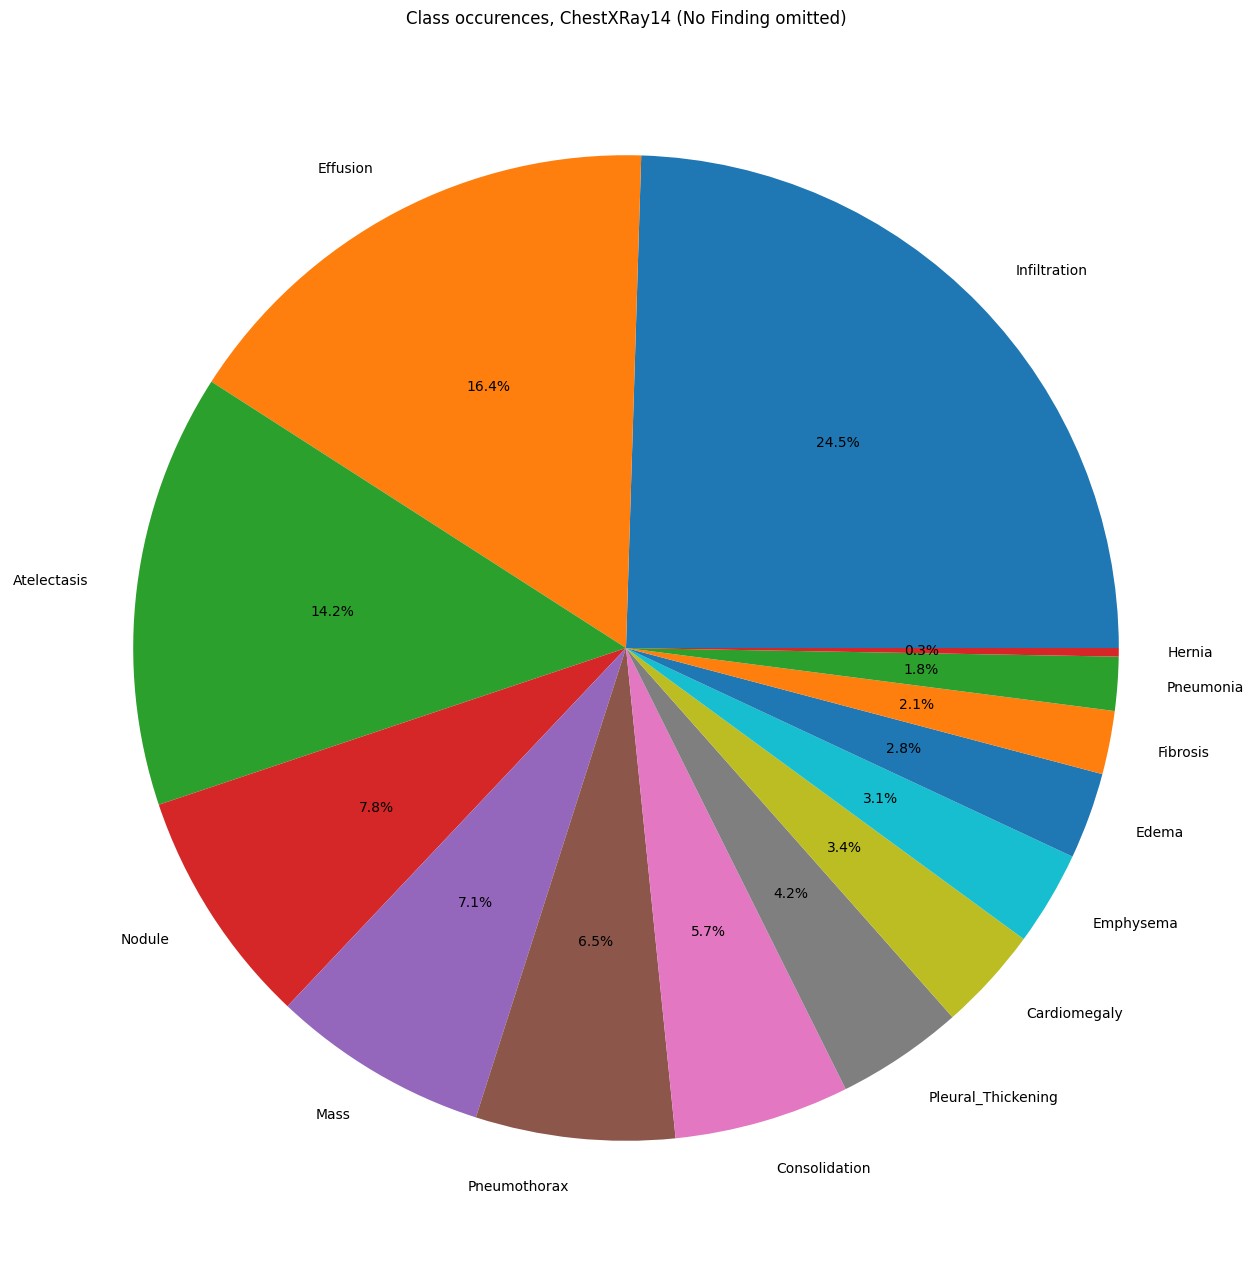

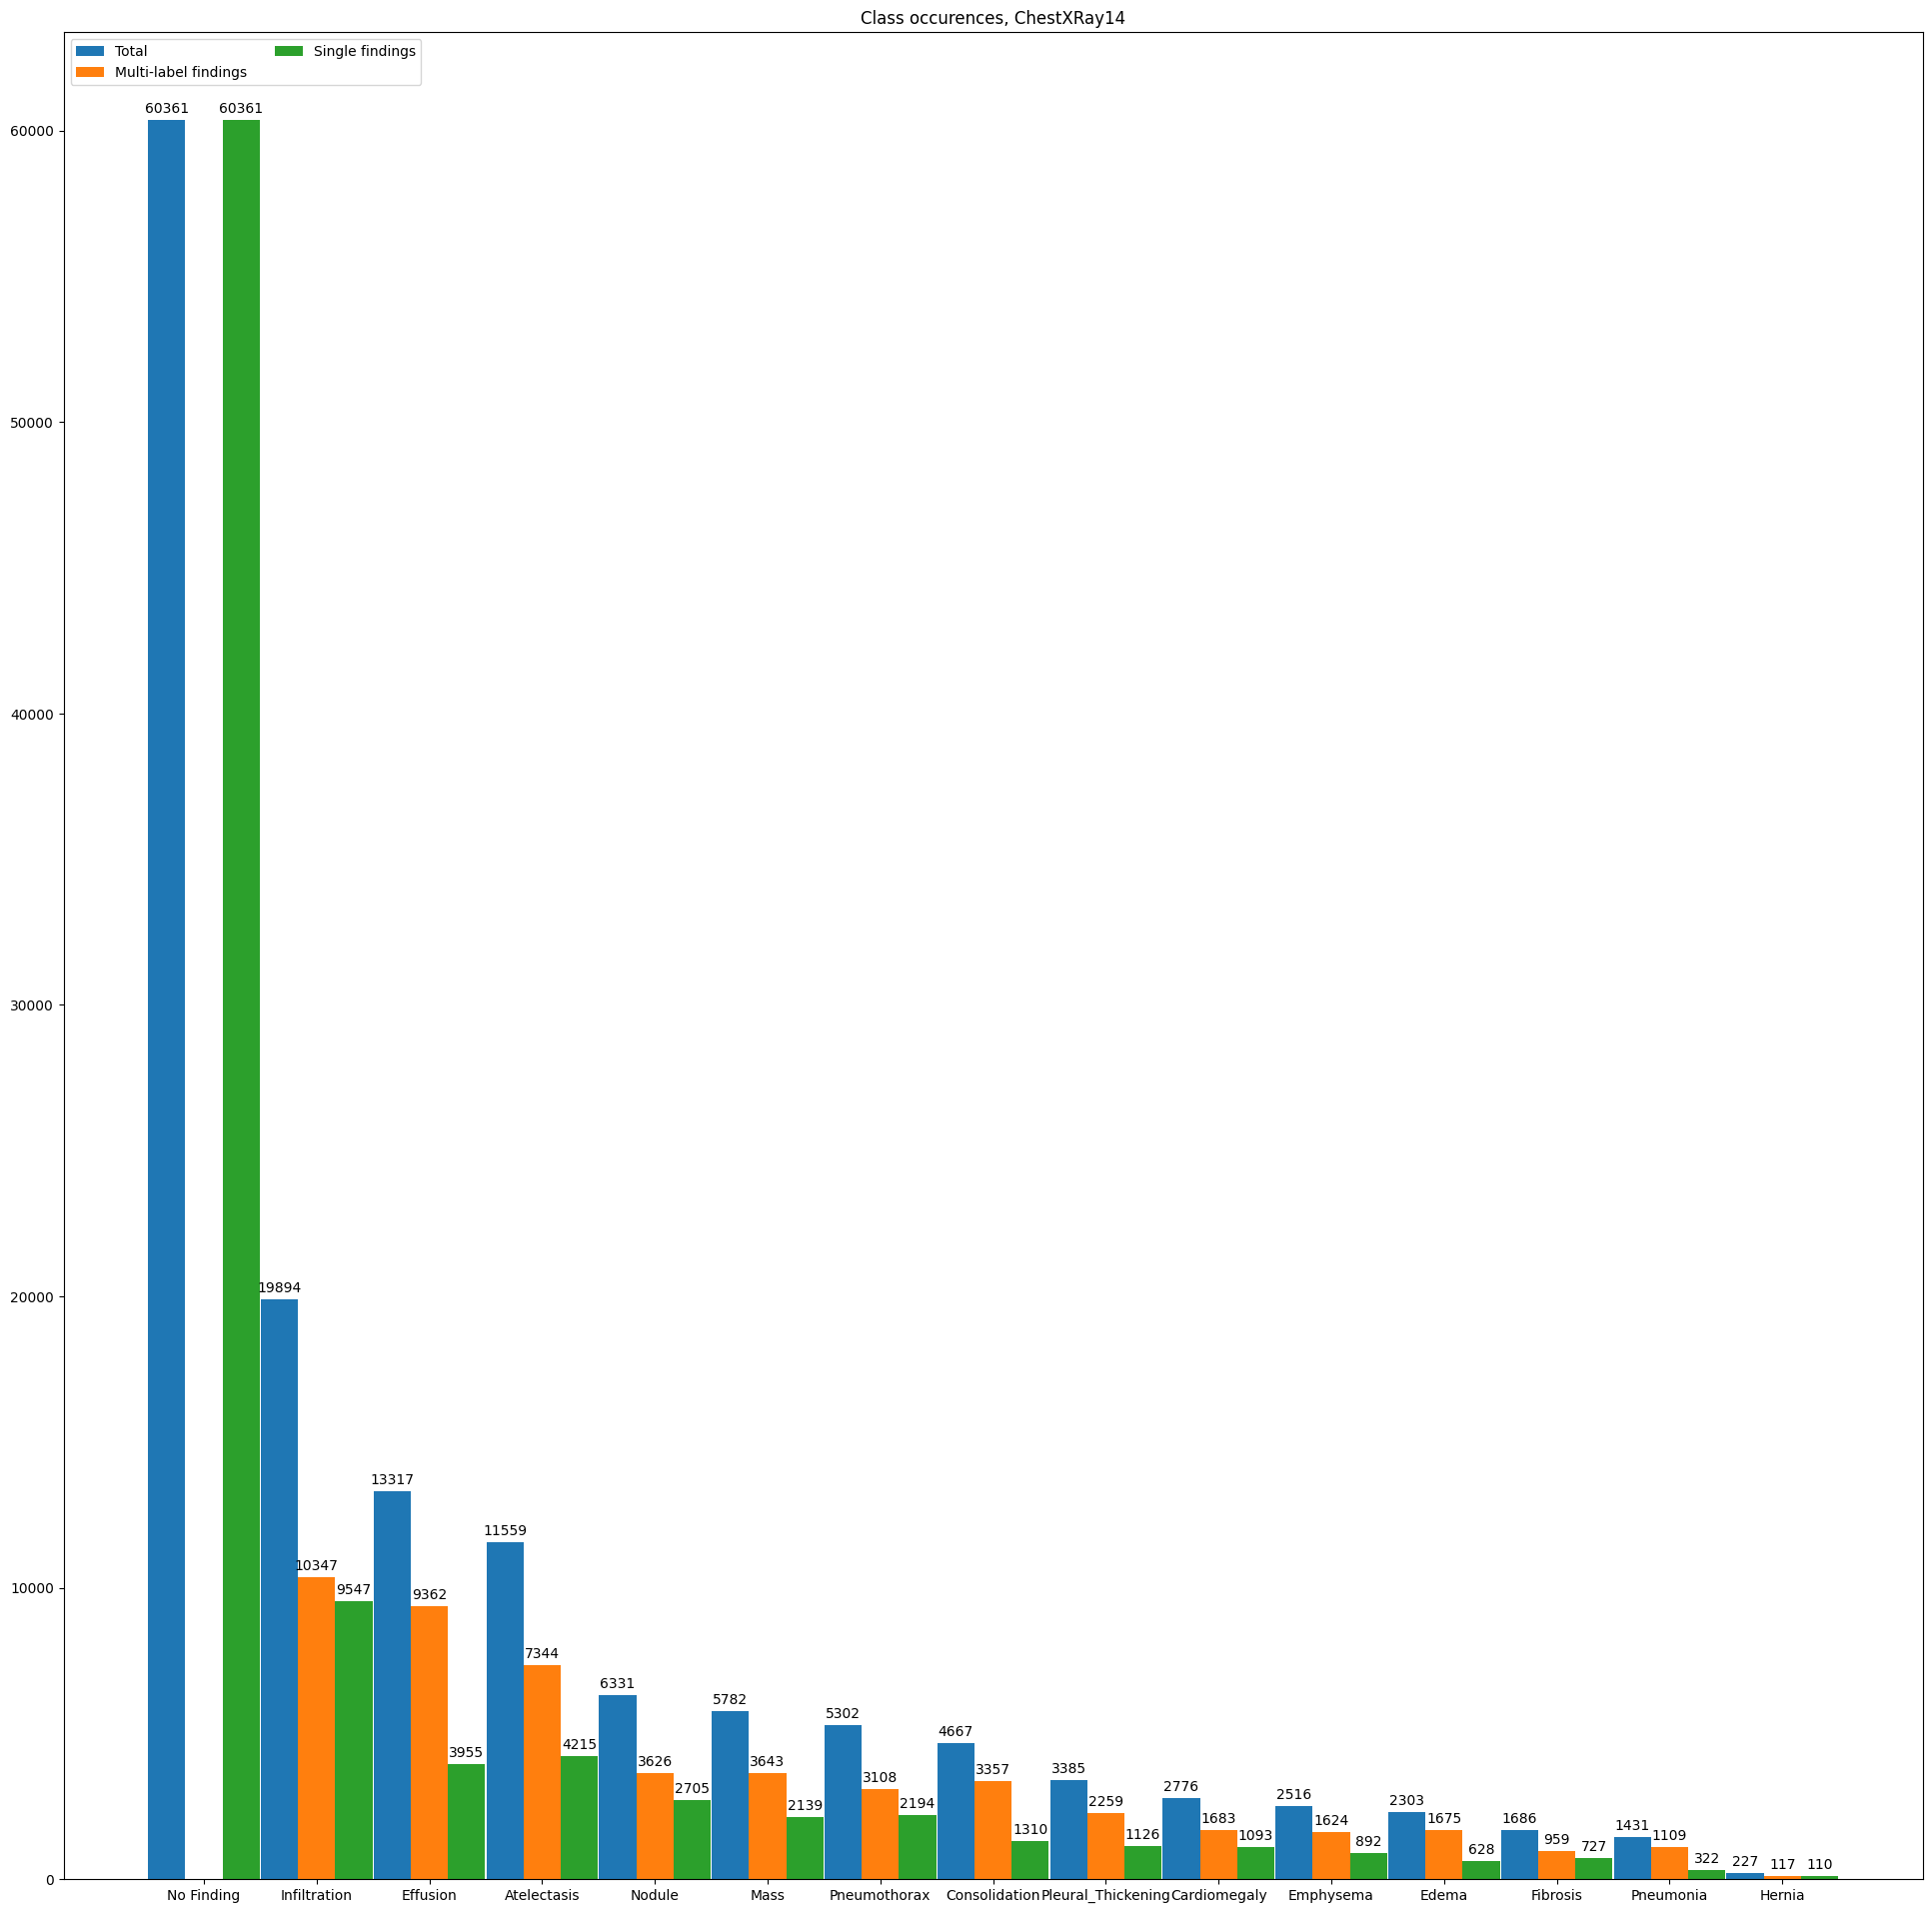

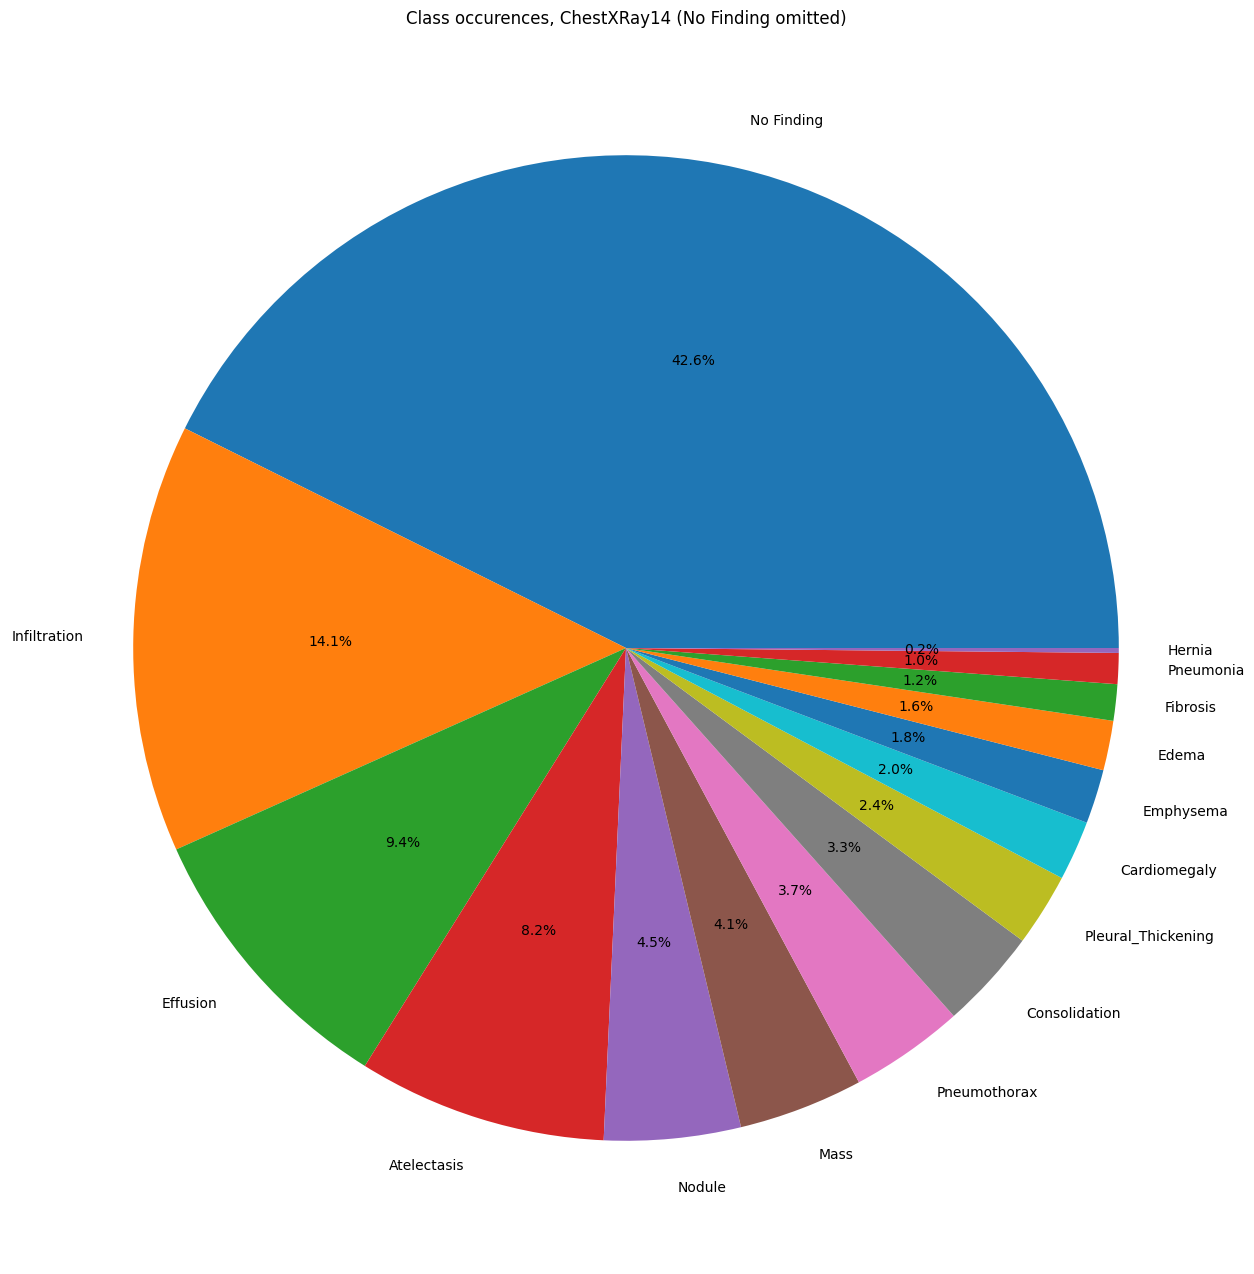

In [9]:
datas = pd.read_csv(os.path.join(db_path, class_file))
classes = ChestXRayDataset.target_labels.copy()
values, finding_df = get_class_counts(datas, classes, "No Finding")
finding_df = finding_df.sort_values(by=["Total"], ascending=False)

analysis_folder = os.path.join("data_analysis", "chestxray14")
create_bar_chart(datas, classes, "No Finding", "Total", "Class occurences, ChestXRay14", os.path.join(analysis_folder, "dist_skip_nofind.png"))
sizes = finding_df.copy().drop(columns=["Multi-label findings", "Single findings"])
create_pie_chart(sizes, "Total", "Class occurences, ChestXRay14 (No Finding omitted)", os.path.join(analysis_folder, "pie_skip_nofind.png"))

datas = pd.read_csv(os.path.join(db_path, class_file))
classes = ChestXRayDataset.target_labels.copy()
classes.append("No Finding")
values, finding_df = get_class_counts(datas, classes, "No Finding")
finding_df = finding_df.sort_values(by=["Total"], ascending=False)
create_bar_chart(datas, classes, "No Finding", "Total", "Class occurences, ChestXRay14", os.path.join(analysis_folder, "dist.png"))
sizes = finding_df.copy().drop(columns=["Multi-label findings", "Single findings"])
create_pie_chart(sizes, "Total", "Class occurences, ChestXRay14 (No Finding omitted)", os.path.join(analysis_folder, "pie.png"))